In [ ]:
#The mnist dataset in TensorFlow (tf.keras.datasets.mnist) is a pre-downloaded dataset provided by the TensorFlow library.
#It originates from the National Institute of Standards and Technology (NIST) and is widely used for training and testing
#machine learning models, particularly in image classification tasks
#The dataset is automatically downloaded from TensorFlow's online storage if it is not already available on your machine.
#The data consists of 70,000 grayscale images of handwritten digits (28x28 pixels each) split into:
#60,000 training examples
#10,000 testing examples

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist


In [ ]:
mnist = tf.keras.datasets.mnist
(x_train,y_train) , (x_test,y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)

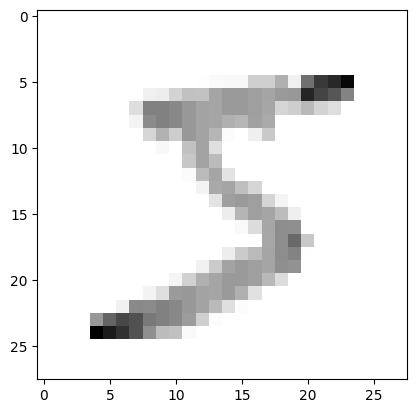

In [ ]:
def draw(n):
    plt.imshow(n,cmap=plt.cm.binary)
    plt.show()

draw(x_train[0])

In [ ]:

#MAke a neural network and train
model = tf.keras.models.Sequential() # traditional neural network

model.add(tf.keras.layers.Flatten(input_shape=(28, 28))) #reshape flat 2D (28*28) pixels into 1D

model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu)) #fully connectedlayer 1 with 128 neurons and ReLU activation function
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu)) #layer 2 with 128 neurons
model.add(tf.keras.layers.Dense(10,activation='softmax'))
#output layer with 10 neurons and softmax is used to convert raw ouput into probabilities and
#10 neurons es leay hain kun k (0-9) ki range me digits hain

model.compile(optimizer='adam',
			loss='sparse_categorical_crossentropy',
			metrics=['accuracy']
			)
model.fit(x_train,y_train,epochs=10) # train images and y train labels hain (0-9)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8663 - loss: 0.4698
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9651 - loss: 0.1135
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9778 - loss: 0.0713
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9839 - loss: 0.0516
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9870 - loss: 0.0390
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9900 - loss: 0.0317
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9934 - loss: 0.0212
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9938 - loss: 0.0182
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9953 - loss: 0.0142
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9958 - loss: 0.0128


In [ ]:
#check model accuracy and loss on test set
val_loss,val_acc = model.evaluate(x_test,y_test) # evalute ka function defined hai tensorflow me
print("loss: ",val_loss,"\nacc: ",val_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9741 - loss: 0.1231
loss:  0.10632398724555969 
acc:  0.9765999913215637


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
label: 2
prediction: 2


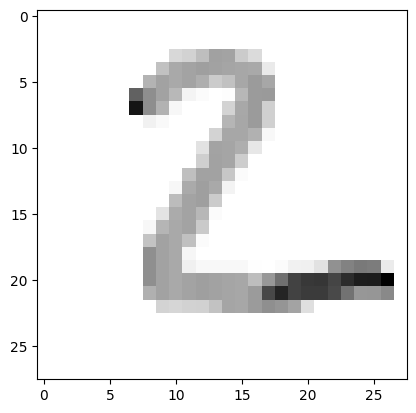

In [ ]:
#Predictions using Model
predictions=model.predict([x_test])
print('label:',y_test[1])
print('prediction:',np.argmax(predictions[1]))
draw(x_test[1])

In [ ]:
#saving model
model.save('my_model.keras')  # This will create a SavedModel directory with the model files


In [ ]:
#load saved model
new_model = tf.keras.models.load_model('my_model.keras')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
label 0
prediction 0


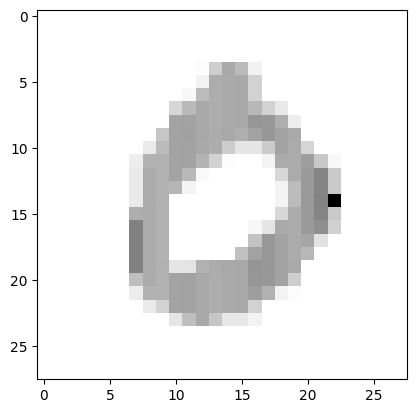

In [ ]:
#Prediction using new model
predictions=new_model.predict([x_test])
print('label',y_test[3])
print('prediction',np.argmax(predictions[3]))
draw(x_test[3])